## Exercise 2: Disk Galaxy in DM Halo
### Withour N-body interaction

In [15]:
%reload_ext autoreload
%autoreload 2

import os

import numpy as np
import matplotlib.pyplot as plt

import h5py

# Module to generate initial conditions as .hdf5 file
from main.make_ics import generate_ics, read_data

# Module to integrate orbits on a NFW potential
from main.nfw import Simulation

# Module to generate plots
import main.plot_utils as pu

Doing basically the same as in the previous exercise, but this time we read the data from `.txt` files in the `data/` folder, which contain 10, 100 and 1000 bodies. Thus we run three separate simulations, without taking into account interaction between the bodies. Thus, running the simulations using the `Simulate` class and RK4 integration: 

In [16]:
# Set the parameters (common to all simulations)

T = 2  # Time of integration
NT = 1000  # Number of time steps
num_snapshots = 500  # Number of snapshots to save (on per time-step)

In [42]:
sim_folder = 'results/nfw_10/'
path_data = 'data/disk10.txt'
POS, VEL, MASS = read_data(path_data)  # Read the data from the file

path_ics = f'{sim_folder}ics.hdf5'
generate_ics(path_ics, POS, VEL, MASS)  # Generate the .hdf5 file

path_output = sim_folder + 'output.hdf5'
Sim = Simulation(path_ics, path_output)

dt = T/NT
Sim.set_time(T, dt, snapshots=num_snapshots)

Sim.set_integrator('RK4')
Sim.run_simulation()
POS10, VEL10, MASS10, TIME = Sim.get_output()

99.90%
Elapsed time: 3.11 s


In [43]:
sim_folder = 'results/nfw_100/'
path_data = 'data/disk100.txt'
POS, VEL, MASS = read_data(path_data)  # Read the data from the file

path_ics = f'{sim_folder}ics.hdf5'
generate_ics(path_ics, POS, VEL, MASS)  # Generate the .hdf5 file

path_output = sim_folder + 'output.hdf5'
Sim = Simulation(path_ics, path_output)

dt = T/NT
Sim.set_time(T, dt, snapshots=num_snapshots)

Sim.set_integrator('RK4')
Sim.run_simulation()
POS100, VEL100, MASS100, TIME = Sim.get_output()

99.90%
Elapsed time: 3.03 s


In [44]:
sim_folder = 'results/nfw_1000/'
path_data = 'data/disk1000.txt'
POS, VEL, MASS = read_data(path_data)  # Read the data from the file

path_ics = f'{sim_folder}ics.hdf5'
generate_ics(path_ics, POS, VEL, MASS)  # Generate the .hdf5 file

path_output = sim_folder + 'output.hdf5'
Sim = Simulation(path_ics, path_output)

dt = T/NT
Sim.set_time(T, dt, snapshots=num_snapshots)

Sim.set_integrator('RK4')
Sim.run_simulation()
POS1000, VEL1000, MASS1000, TIME = Sim.get_output()

99.90%
Elapsed time: 3.23 s


We observe that there is no appreciable difference in runtime for 10, 100, and 1000 bodies. This is because the code is fast enough that most of the time is spent on .hdf5 writing overhead. However, due to the nature of the code, there is only one may loop for the computation of accelerations per each time-step. This can be seen in the `net_fields()` function in `nfw.py`. Therefore the computational complexity here is $\mathcal{O}\left( N \right)$.

## Plotting the orbits

We plot them as a heatmap in the XY and XZ planes. For heatmap we mean that, during the whole integration time, we compute in a grid the cumulative amount of mass per gridcell over all time-steps. So the units here are $\text{M}_{\odot} \, \text{kpc}^{-2} \, \text{Gyr}$.

We observe in the XY projection that the orbits are mostly circular. Therefore the shape of the galaxy is mantained during the whole simulation. From the XZ projection we see how the galaxy is indeed a disk, and that it has minor vertical deviations from the equatorial plane. All this is expected if there is no interaction between bodies. 

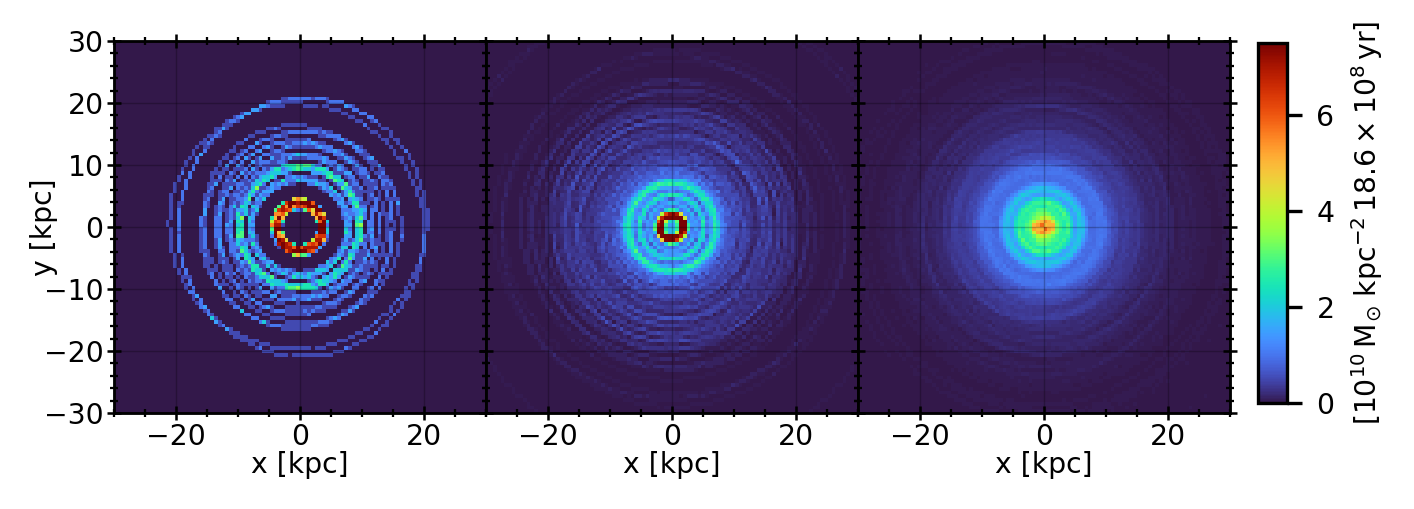

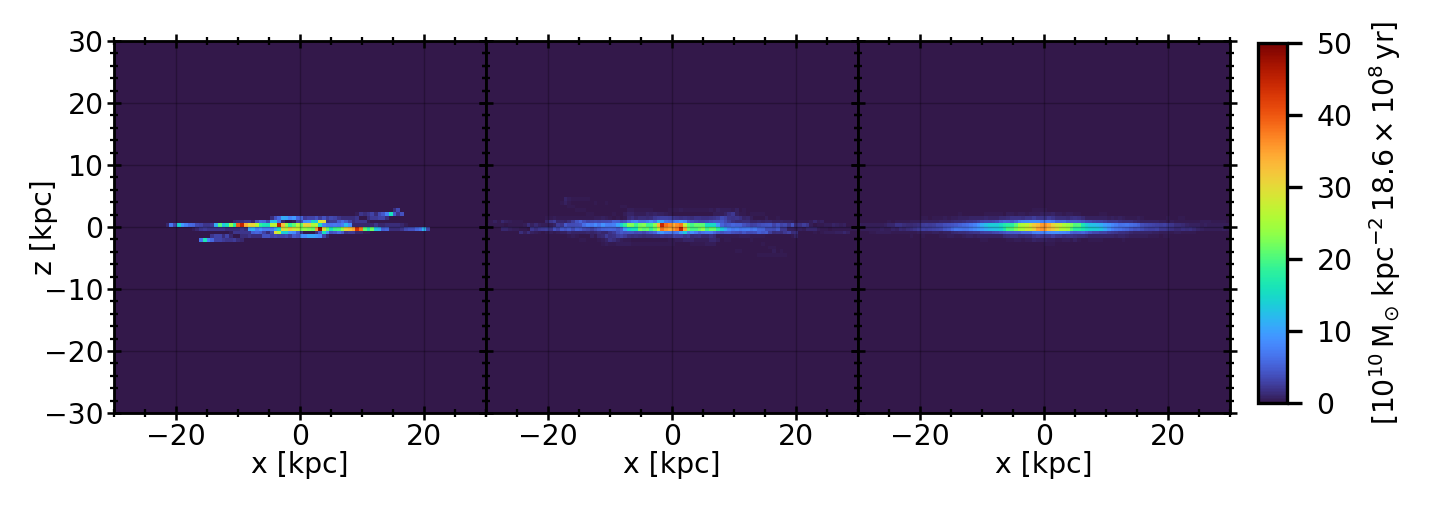

In [38]:
savepath = 'figures/ex2_galaxy_orbits_XY.jpg'
pu.plot_galaxy_orbits(POS10, MASS10, POS100, MASS100, POS1000, MASS1000, savepath,
                      projection='XY',
                      lim=30,
                      res=100, vmax=7.5)

savepath = 'figures/ex2_galaxy_orbits_XZ.jpg'
pu.plot_galaxy_orbits(POS10, MASS10, POS100, MASS100, POS1000, MASS1000, savepath,
                      projection='XZ',
                      lim=30,
                      res=100, vmax=50)